In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_table.csv")

/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_4042/102935152.py:1: DtypeWarning: Columns (2,11,12,15,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_table.csv")


In [3]:
df.head()

,CONF_CODE,ORDER_ROW,JO_PROG,STATE,CUST_CODE,PRESCRIPTION,PRIORITY_COMP,PRODUCT_CODE,MATERIAL_CODE,BATCH_NUMBER,...,Desing,FrozenFor,NameFam,Name_LinProd,Name_SubFam,Combined_Radius,Combined_Diameter,Combined_Power,Combined_Cylinder,Combined_Axis
0,AA0001,1,0,6.0,CFR63516,2.0,253.0,U3_ACTIVO,2001.0,13833,...,U3V2_ACTIVO,N,MENSUALES,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
1,AA0001,2,0,6.0,CFR63516,2.0,253.0,U3_ACTIVO,2001.0,13833,...,U3V2_ACTIVO,N,MENSUALES,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
2,AA0001,3,0,6.0,CFR63516,2.0,0.0,U3_ACTIVO,2001.0,13858,...,U3V2_ACTIVO,N,MENSUALES,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
3,AA0001,4,0,6.0,CFR63516,2.0,0.0,U3_ACTIVO,2001.0,13858,...,U3V2_ACTIVO,N,MENSUALES,SAPHIR RX,SPHERIC,9.2,14.5,-1.5,0.0,0.0
4,AA0001,5,0,6.0,CFR63516,2.0,253.0,U3_ACTIVO,2001.0,13833,...,U3V2_ACTIVO,N,MENSUALES,SAPHIR RX,SPHERIC,9.2,14.5,-1.5,0.0,0.0


In [4]:
df.dtypes

CONF_CODE             object
ORDER_ROW             object
JO_PROG               object
STATE                float64
CUST_CODE             object
PRESCRIPTION         float64
PRIORITY_COMP        float64
PRODUCT_CODE          object
MATERIAL_CODE        float64
BATCH_NUMBER          object
LATHE_SETUP           object
STEEP_RADIUS          object
BACK_AXIS             object
CENTER_THK            object
JUNCTION_THK          object
EDGE_THK              object
MEAS_BASE_RADIUS      object
MEAS_STEEP_RADIUS     object
TRAY_CODE            float64
STERIL_CODE          float64
STERIL_BATCH          object
LABEL_PRINTED        float64
SCHEDULED_DATE        object
SCHEDULED_QTY        float64
LAUNCH_DATE           object
REJECTS_QTY          float64
DELIVERY_DATE         object
Numero_Pedido        float64
Linea_Pedido         float64
ItemCode              object
Prod_sId              object
Adicion               object
Comments              object
ItemName              object
Desing        

In [5]:
import pandas as pd

# Assuming 'df' is the DataFrame containing the data

# Get the top 10 ItemName with the most counts
top_10_items = df['ItemName'].value_counts().nlargest(10)

# Display the top 10 items
print(top_10_items)


Saphir Rx Toric Blister     3123275
Gentle 59 Toric Blister      962158
Saphir Rx MFT CD Blister     943092
Saphir Rx Sph Blister        681134
Blister Toric Rx             634137
Saphir Rx MFT CN Blister     567249
Gentle 80 Toric Blister      429643
Gentle 59 MFT CD Blister     406534
Saphir Rx MF CD Blister      262179
Gentle 59 Sph Blister        254401
Name: ItemName, dtype: int64


In [6]:
import pandas as pd

# Assuming 'df' is the DataFrame containing the data

# Get the top 10 ItemName with the most counts
top_10_items = df['ItemName'].value_counts().nlargest(10)

# Calculate the total count
total_count = df['ItemName'].count()

# Calculate the percentage of the top 10 vs total
percentage = (top_10_items.sum() / total_count) * 100

# Display the percentage
print(f"Percentage of top 10 items: {percentage:.2f}%")


Percentage of top 10 items: 68.24%


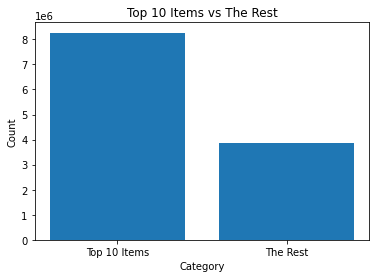

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data

# Get the top 10 ItemName with the most counts
top_10_items = df['ItemName'].value_counts().nlargest(10)

# Calculate the count of the rest of the items
rest_count = df['ItemName'].count() - top_10_items.sum()

# Create a DataFrame for the top 10 items and the rest
data = pd.DataFrame({'ItemName': ['Top 10 Items', 'The Rest'], 'Count': [top_10_items.sum(), rest_count]})

# Plot the bar chart
plt.bar(data['ItemName'], data['Count'])

# Set the labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Items vs The Rest')

# Display the plot
plt.show()


In [8]:
import pandas as pd

# Assuming your dataframe is named 'df'

# Filter the dataframe for the specific item name
filtered_df = df[df['ItemName'] == 'Gentle 59 Toric Blister']

# Extract the year from the 'SCHEDULED_DATE' column
filtered_df['Year'] = pd.to_datetime(filtered_df['SCHEDULED_DATE']).dt.year

# Remove the year 2013 from the dataframe
filtered_df = filtered_df[filtered_df['Year'] != 2013]

# Create a pivot table with the desired combinations and separate columns for each year
pivot_table = pd.pivot_table(filtered_df, values='SCHEDULED_QTY', index=['Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder'], columns='Year', aggfunc='sum')

# Sort the pivot table by the latest year
sorted_pivot_table = pivot_table.sort_values(by=pivot_table.columns[-1], ascending=False)

# Retrieve the top 5 combinations and their counts
top_5_combinations = sorted_pivot_table.head(5)

# Print the result
top_5_combinations


/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_4042/2083467873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_datetime(filtered_df['SCHEDULED_DATE']).dt.year


Year                                                                2014.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75                17.0   
                                  -11.0          -1.75                11.0   
                                  -10.5          -1.25                28.0   
                                  -11.5          -1.25                15.0   
8.3             14.5               0.0           -3.50                 4.0   

Year                                                                2015.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75                48.0   
                                  -11.0          -1.75                49.0   
                                  -10.5          -1.25                54.0   
                                  -11.5          -1.25                49.0   
8.3             14.5               0.0           -3.50                17.0   

Year                                                                2016.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75                53.0   
                                  -11.0          -1.75                84.0   
                                  -10.5          -1.25               127.0   
                                  -11.5          -1.25                62.0   
8.3             14.5               0.0           -3.50                47.0   

Year                                                                2017.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75                60.0   
                                  -11.0          -1.75                91.0   
                                  -10.5          -1.25               129.0   
                                  -11.5          -1.25                67.0   
8.3             14.5               0.0           -3.50                25.0   

Year                                                                2018.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75                49.0   
                                  -11.0          -1.75               128.0   
                                  -10.5          -1.25               154.0   
                                  -11.5          -1.25               129.0   
8.3             14.5               0.0           -3.50                51.0   

Year                                                                2019.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75               118.0   
                                  -11.0          -1.75               137.0   
                                  -10.5          -1.25               216.0   
                                  -11.5          -1.25               137.0   
8.3             14.5               0.0           -3.50                43.0   

Year                                                                2020.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -12.0          -1.75               109.0   
                                  -11.0          -1.75               116.0   
                                  -10.5          -1.25               181.0   
                                  -11.5          -1.25               157.0   
8.3             14.5               0.0           -3.50                44.0   

Year                                                                2021.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6            

In [9]:
import pandas as pd

# Assuming your dataframe is named 'df'

# Filter the dataframe for the specific item name
filtered_df = df[df['ItemName'] == 'Saphir Rx MFT CD Blister']

# Extract the year from the 'SCHEDULED_DATE' column
filtered_df['Year'] = pd.to_datetime(filtered_df['SCHEDULED_DATE']).dt.year

# Remove the year 2013 from the dataframe
filtered_df = filtered_df[filtered_df['Year'] != 2013]

# Create a pivot table with the desired combinations and separate columns for each year
pivot_table = pd.pivot_table(filtered_df, values='SCHEDULED_QTY', index=['Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder'], columns='Year', aggfunc='sum')

# Sort the pivot table by the latest year
sorted_pivot_table = pivot_table.sort_values(by=pivot_table.columns[-1], ascending=False)

# Retrieve the top 5 combinations and their counts
top_5_combinations1 = sorted_pivot_table.head(5)

# Print the result
top_5_combinations1


/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_4042/3163639003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_datetime(filtered_df['SCHEDULED_DATE']).dt.year


Year                                                                2012.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               120.0   
                                  -2.50          -1.25               129.0   
                                  -2.25          -0.75               109.0   
                                  -1.75          -0.75               109.0   
                                  -3.50          -1.25               102.0   

Year                                                                2014.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               185.0   
                                  -2.50          -1.25               163.0   
                                  -2.25          -0.75               199.0   
                                  -1.75          -0.75               113.0   
                                  -3.50          -1.25               138.0   

Year                                                                2015.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               256.0   
                                  -2.50          -1.25               174.0   
                                  -2.25          -0.75                92.0   
                                  -1.75          -0.75               119.0   
                                  -3.50          -1.25               184.0   

Year                                                                2016.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               237.0   
                                  -2.50          -1.25               149.0   
                                  -2.25          -0.75               117.0   
                                  -1.75          -0.75               118.0   
                                  -3.50          -1.25               210.0   

Year                                                                2017.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               258.0   
                                  -2.50          -1.25               125.0   
                                  -2.25          -0.75               104.0   
                                  -1.75          -0.75               148.0   
                                  -3.50          -1.25               169.0   

Year                                                                2018.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               244.0   
                                  -2.50          -1.25               157.0   
                                  -2.25          -0.75               142.0   
                                  -1.75          -0.75               217.0   
                                  -3.50          -1.25               201.0   

Year                                                                2019.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -3.25          -0.75               200.0   
                                  -2.50          -1.25               160.0   
                                  -2.25          -0.75               206.0   
                                  -1.75          -0.75               322.0   
                                  -3.50          -1.25               238.0   

Year                                                                2020.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6            

In [10]:
import pandas as pd

# Assuming your dataframe is named 'df'

# Filter the dataframe for the specific item name
filtered_df = df[df['ItemName'] == 'Saphir Rx MFT CN Blister']

# Extract the year from the 'SCHEDULED_DATE' column
filtered_df['Year'] = pd.to_datetime(filtered_df['SCHEDULED_DATE']).dt.year

# Remove the year 2013 from the dataframe
filtered_df = filtered_df[filtered_df['Year'] != 2013]

# Create a pivot table with the desired combinations and separate columns for each year
pivot_table = pd.pivot_table(filtered_df, values='SCHEDULED_QTY', index=['Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder'], columns='Year', aggfunc='sum')

# Sort the pivot table by the latest year
sorted_pivot_table = pivot_table.sort_values(by=pivot_table.columns[-1], ascending=False)

# Retrieve the top 5 combinations and their counts
top_5_combinations2 = sorted_pivot_table.head(5)

# Print the result
top_5_combinations2


/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_4042/2570291113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_datetime(filtered_df['SCHEDULED_DATE']).dt.year


Year                                                                2012.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25                32.0   
                                  -2.00          -0.75                96.0   
8.3             14.5              -3.25          -1.25                25.0   
                                  -4.25          -0.75                25.0   
                                  -2.00          -1.25                75.0   

Year                                                                2014.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25                97.0   
                                  -2.00          -0.75                81.0   
8.3             14.5              -3.25          -1.25                44.0   
                                  -4.25          -0.75                54.0   
                                  -2.00          -1.25               101.0   

Year                                                                2015.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25               147.0   
                                  -2.00          -0.75                68.0   
8.3             14.5              -3.25          -1.25                48.0   
                                  -4.25          -0.75                68.0   
                                  -2.00          -1.25               102.0   

Year                                                                2016.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25               139.0   
                                  -2.00          -0.75                66.0   
8.3             14.5              -3.25          -1.25                73.0   
                                  -4.25          -0.75                47.0   
                                  -2.00          -1.25               118.0   

Year                                                                2017.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25                85.0   
                                  -2.00          -0.75               113.0   
8.3             14.5              -3.25          -1.25                72.0   
                                  -4.25          -0.75                59.0   
                                  -2.00          -1.25                72.0   

Year                                                                2018.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25                77.0   
                                  -2.00          -0.75               117.0   
8.3             14.5              -3.25          -1.25                63.0   
                                  -4.25          -0.75                79.0   
                                  -2.00          -1.25                60.0   

Year                                                                2019.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6             14.5              -2.75          -1.25               117.0   
                                  -2.00          -0.75                98.0   
8.3             14.5              -3.25          -1.25                94.0   
                                  -4.25          -0.75                89.0   
                                  -2.00          -1.25                62.0   

Year                                                                2020.0  \
Combined_Radius Combined_Diameter Combined_Power Combined_Cylinder           
8.6            

In [11]:
top_5_combinations2.to_csv('t5_br.csv')

In [12]:
top_5_combinations1.to_csv('t5_rx.csv')

In [13]:
top_5_combinations.to_csv('t5_g59.csv')

In [14]:
t5rx = pd.read_csv('t5_rx.csv')

In [15]:
t5 = pd.read_csv('t5_g59.csv')

In [16]:
t5

,Combined_Radius,Combined_Diameter,Combined_Power,Combined_Cylinder,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,8.6,14.5,-12.0,-1.75,17.0,48.0,53.0,60.0,49.0,118.0,109.0,148.0,148.0,79.0
1,8.6,14.5,-11.0,-1.75,11.0,49.0,84.0,91.0,128.0,137.0,116.0,159.0,143.0,71.0
2,8.6,14.5,-10.5,-1.25,28.0,54.0,127.0,129.0,154.0,216.0,181.0,206.0,210.0,69.0
3,8.6,14.5,-11.5,-1.25,15.0,49.0,62.0,67.0,129.0,137.0,157.0,163.0,195.0,66.0
4,8.3,14.5,0.0,-3.50,4.0,17.0,47.0,25.0,51.0,43.0,44.0,67.0,108.0,58.0


In [17]:
t5.dtypes

Combined_Radius      float64
Combined_Diameter    float64
Combined_Power       float64
Combined_Cylinder    float64
2014.0               float64
2015.0               float64
2016.0               float64
2017.0               float64
2018.0               float64
2019.0               float64
2020.0               float64
2021.0               float64
2022.0               float64
2023.0               float64
dtype: object

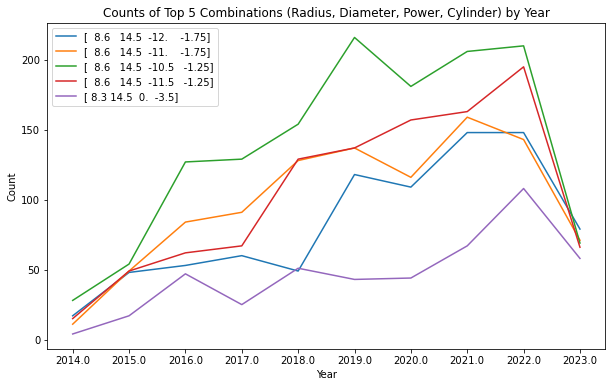

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 't5' is the DataFrame containing the data

# Select the necessary columns for plotting
df_plot = t5[['Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0', '2022.0', '2023.0']]

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Set the 'Year' column as the x-axis
x = df_plot.columns[4:]

# Loop through each combination and plot the line graph
for i in range(len(df_plot)):
    combination = df_plot.iloc[i, :4]
    counts = df_plot.iloc[i, 4:].tolist()  # Convert counts to a list
    plt.plot(x, counts, label=str(combination.values))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Top 5 Combinations (Radius, Diameter, Power, Cylinder) by Year')

# Add a legend
plt.legend()

# Display the chart
plt.show()


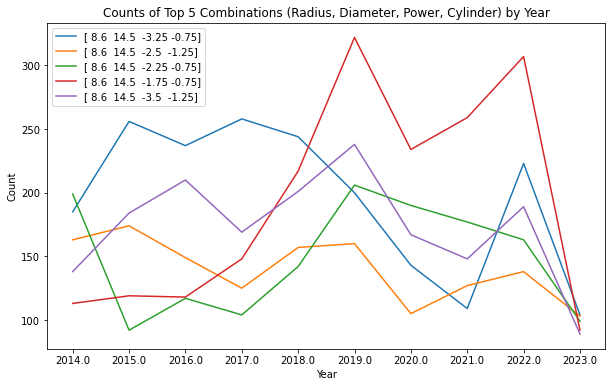

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 't5' is the DataFrame containing the data

# Select the necessary columns for plotting
df_plot = t5rx[['Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0', '2022.0', '2023.0']]

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Set the 'Year' column as the x-axis
x = df_plot.columns[4:]

# Loop through each combination and plot the line graph
for i in range(len(df_plot)):
    combination = df_plot.iloc[i, :4]
    counts = df_plot.iloc[i, 4:].tolist()  # Convert counts to a list
    plt.plot(x, counts, label=str(combination.values))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Top 5 Combinations (Radius, Diameter, Power, Cylinder) by Year')

# Add a legend
plt.legend()

# Display the chart
plt.show()


In [22]:
t5br = pd.read_csv('t5_br.csv')

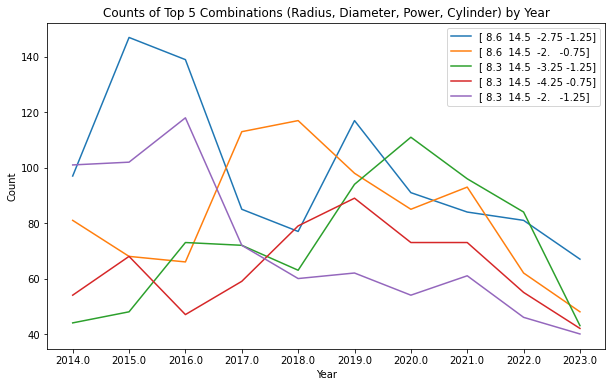

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 't5' is the DataFrame containing the data

# Select the necessary columns for plotting
df_plot = t5br[['Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0', '2022.0', '2023.0']]

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Set the 'Year' column as the x-axis
x = df_plot.columns[4:]

# Loop through each combination and plot the line graph
for i in range(len(df_plot)):
    combination = df_plot.iloc[i, :4]
    counts = df_plot.iloc[i, 4:].tolist()  # Convert counts to a list
    plt.plot(x, counts, label=str(combination.values))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Top 5 Combinations (Radius, Diameter, Power, Cylinder) by Year')

# Add a legend
plt.legend()

# Display the chart
plt.show()

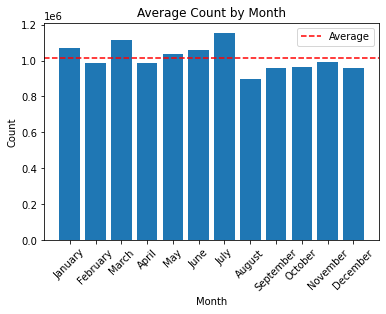

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data
# Convert 'SCHEDULED_DATE' column to datetime
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])

# Extract the month as a period index
df['Month'] = df['SCHEDULED_DATE'].dt.month_name()

# Calculate the count of rows for each month
count_by_month = df.groupby('Month').size()

# Calculate the average count of rows for each month
average_count_by_month = count_by_month.mean()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Sort the count by month using the defined order
count_by_month = count_by_month.reindex(month_order)

# Create a bar plot
plt.bar(count_by_month.index, count_by_month.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Count by Month')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a horizontal line representing the average count
plt.axhline(y=average_count_by_month, color='r', linestyle='--', label='Average')

# Add a legend
plt.legend()

# Display the plot
plt.show()


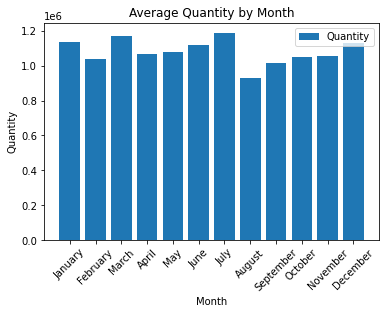

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data
# Convert 'SCHEDULED_DATE' column to datetime
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])

# Extract the month as a period index
df['Month'] = df['SCHEDULED_DATE'].dt.month_name()

# Calculate the sum of 'SCHEDULED_QTY' for each month
sum_qty_by_month = df.groupby('Month')['SCHEDULED_QTY'].sum()

# Calculate the average 'SCHEDULED_QTY' for each month
average_qty_by_month = df.groupby('Month')['SCHEDULED_QTY'].mean()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Sort the sums and averages by month using the defined order
sum_qty_by_month = sum_qty_by_month.reindex(month_order)
average_qty_by_month = average_qty_by_month.reindex(month_order)

# Create a bar plot for the sums of 'SCHEDULED_QTY'
plt.bar(sum_qty_by_month.index, sum_qty_by_month.values, label='Quantity')


# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Average Quantity by Month')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [26]:
top_variations = df.groupby(['ItemName', 'Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder']).size().nlargest(5)


In [27]:
top_variations

ItemName               Combined_Radius  Combined_Diameter  Combined_Power  Combined_Cylinder
Blister Toric Rx       8.7              14.4                0.0            -3.25                10269
                                                                           -3.75                 7910
Saphir Rx Sph Blister  8.6              14.5               -16.0            0.00                 5580
                                                           -15.0            0.00                 5569
                                                           -14.0            0.00                 5568
dtype: int64

In [28]:
df[df['SCHEDULED_DATE'].dt.year == 2022].groupby(['ItemName', 'Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder']).size().nlargest(5)


ItemName               Combined_Radius  Combined_Diameter  Combined_Power  Combined_Cylinder
Saphir Rx Sph Blister  8.6              16.0                0.0            0.0                  922
                       8.9              16.0                0.0            0.0                  913
MYLO Blister           8.3              14.5               -3.5            0.0                  825
                                                           -3.0            0.0                  737
                                                           -2.5            0.0                  729
dtype: int64

In [29]:
df[df['SCHEDULED_DATE'].dt.year == 2021].groupby(['ItemName', 'Combined_Radius', 'Combined_Diameter', 'Combined_Power', 'Combined_Cylinder']).size().nlargest(5)


ItemName               Combined_Radius  Combined_Diameter  Combined_Power  Combined_Cylinder
Saphir Rx Sph Blister  8.6              16.0                0.0             0.00                901
                       8.9              16.0                0.0             0.00                701
Blister Toric Rx       8.7              14.4                0.0            -3.25                677
                                                                           -3.75                584
MYLO Blister           8.3              14.5               -4.0             0.00                577
dtype: int64

/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_4042/1525717867.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['SCHEDULED_DATE'] = pd.to_datetime(filtered_data['SCHEDULED_DATE'])
/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_4042/1525717867.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['SCHEDULED_DATE'].dt.to_period('M')


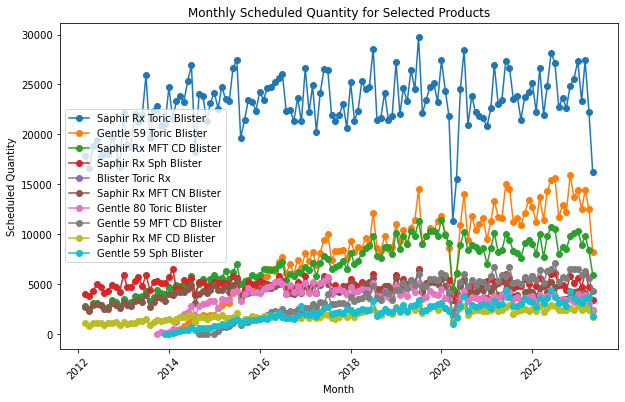

In [31]:
#graph3
import pandas as pd
import matplotlib.pyplot as plt

# List of product names to plot
product_names = [
    "Saphir Rx Toric Blister",
    "Gentle 59 Toric Blister",
    "Saphir Rx MFT CD Blister",
    "Saphir Rx Sph Blister",
    "Blister Toric Rx",
    "Saphir Rx MFT CN Blister",
    "Gentle 80 Toric Blister",
    "Gentle 59 MFT CD Blister",
    "Saphir Rx MF CD Blister",
    "Gentle 59 Sph Blister"
]

# Filter the data for the specific products
filtered_data = df[df['ItemName'].isin(product_names)]

# Convert the 'SCHEDULED_DATE' column to datetime
filtered_data['SCHEDULED_DATE'] = pd.to_datetime(filtered_data['SCHEDULED_DATE'])

# Extract the month from the 'SCHEDULED_DATE' column
filtered_data['Month'] = filtered_data['SCHEDULED_DATE'].dt.to_period('M')

# Group the data by product and month, and calculate the sum of scheduled quantity
grouped_data = filtered_data.groupby(['ItemName', 'Month'])['SCHEDULED_QTY'].sum().reset_index()

# Create a line plot for each product
plt.figure(figsize=(10, 6))
for product_name in product_names:
    product_data = grouped_data[grouped_data['ItemName'] == product_name]
    x_values = pd.to_datetime(product_data['Month'].astype(str))  # Convert Period to datetime
    plt.plot(x_values, product_data['SCHEDULED_QTY'], marker='o', label=product_name)

plt.xlabel('Month')
plt.ylabel('Scheduled Quantity')
plt.title('Monthly Scheduled Quantity for Selected Products')
plt.legend()
plt.xticks(rotation=45)
plt.show()


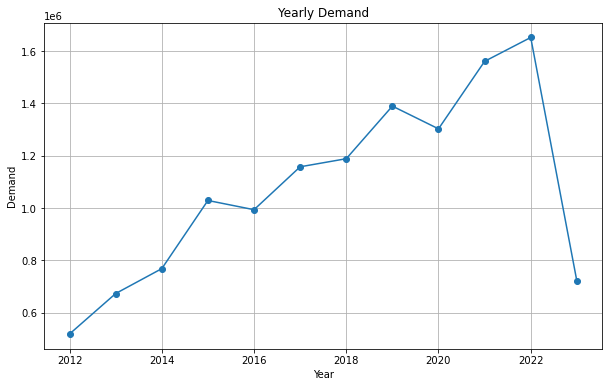

In [34]:
#first graph
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])
df['Year'] = df['SCHEDULED_DATE'].dt.year
yearly_demand = df.groupby('Year')['SCHEDULED_QTY'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_demand['Year'], yearly_demand['SCHEDULED_QTY'], marker='o')

plt.xlabel('Year')
plt.ylabel('Demand')
plt.title('Yearly Demand')
plt.grid(True)  # Add grid lines
plt.show()


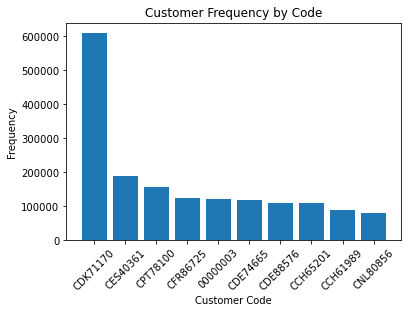

In [35]:
#GRAPH 6
import matplotlib.pyplot as plt

# Data for the bar chart
customer_codes = ['CDK71170', 'CES40361', 'CPT78100', 'CFR86725', '00000003', 'CDE74665', 'CDE88576', 'CCH65201', 'CCH61989', 'CNL80856']
frequency = [609801, 189957, 156068, 123608, 120242, 117524, 109138, 108309, 89317, 80078]

# Create the bar chart
plt.bar(customer_codes, frequency)
plt.xlabel('Customer Code')
plt.ylabel('Frequency')
plt.title('Customer Frequency by Code')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

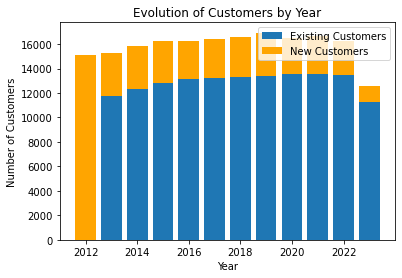

In [37]:
#GRAPH 7
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'SCHEDULED_DATE' column to datetime
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])

# Group the data by year and count the unique customer codes
customer_counts = df.groupby(df['SCHEDULED_DATE'].dt.year)['CUST_CODE'].nunique()

# Initialize lists to store the counts of new and existing customers
new_customer_counts = []
existing_customer_counts = []

# Iterate over the years and calculate the counts
for year in customer_counts.index:
    if year == min(customer_counts.index):
        new_customers = customer_counts[year]
        existing_customers = 0
    else:
        new_customers = len(set(df[df['SCHEDULED_DATE'].dt.year == year]['CUST_CODE']) - set(df[df['SCHEDULED_DATE'].dt.year == (year - 1)]['CUST_CODE']))
        existing_customers = len(set(df[df['SCHEDULED_DATE'].dt.year == year]['CUST_CODE']) & set(df[df['SCHEDULED_DATE'].dt.year == (year - 1)]['CUST_CODE']))
    
    new_customer_counts.append(new_customers)
    existing_customer_counts.append(existing_customers)

# Create the bar chart
years = customer_counts.index
plt.bar(years, existing_customer_counts, label='Existing Customers', color='#1f77b4')
plt.bar(years, new_customer_counts, bottom=existing_customer_counts, label='New Customers', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Evolution of Customers by Year')
plt.legend()

# Display the bar chart
plt.show()

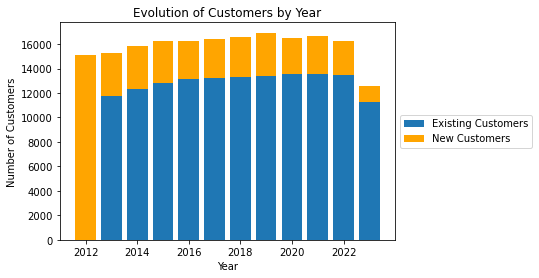

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'SCHEDULED_DATE' column to datetime
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])

# Group the data by year and count the unique customer codes
customer_counts = df.groupby(df['SCHEDULED_DATE'].dt.year)['CUST_CODE'].nunique()

# Initialize lists to store the counts of new and existing customers
new_customer_counts = []
existing_customer_counts = []

# Iterate over the years and calculate the counts
for year in customer_counts.index:
    if year == min(customer_counts.index):
        new_customers = customer_counts[year]
        existing_customers = 0
    else:
        new_customers = len(set(df[df['SCHEDULED_DATE'].dt.year == year]['CUST_CODE']) - set(df[df['SCHEDULED_DATE'].dt.year == (year - 1)]['CUST_CODE']))
        existing_customers = len(set(df[df['SCHEDULED_DATE'].dt.year == year]['CUST_CODE']) & set(df[df['SCHEDULED_DATE'].dt.year == (year - 1)]['CUST_CODE']))
    
    new_customer_counts.append(new_customers)
    existing_customer_counts.append(existing_customers)

# Create the bar chart
years = customer_counts.index
plt.bar(years, existing_customer_counts, label='Existing Customers', color='#1f77b4')
plt.bar(years, new_customer_counts, bottom=existing_customer_counts, label='New Customers', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Evolution of Customers by Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the bar chart
plt.show()

In [40]:
# Convert the 'SCHEDULED_DATE' column to datetime
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])

# Group the data by year and count the unique customer codes
customer_counts = df.groupby(df['SCHEDULED_DATE'].dt.year)['CUST_CODE'].nunique()

# Initialize lists to store the counts of new and existing customers
new_customer_counts = []
existing_customer_counts = []

# Iterate over the years and calculate the counts
for year in customer_counts.index:
    if year == min(customer_counts.index):
        new_customers = customer_counts[year]
        existing_customers = 0
    else:
        new_customers = len(set(df[df['SCHEDULED_DATE'].dt.year == year]['CUST_CODE']) - set(df[df['SCHEDULED_DATE'].dt.year == (year - 1)]['CUST_CODE']))
        existing_customers = len(set(df[df['SCHEDULED_DATE'].dt.year == year]['CUST_CODE']) & set(df[df['SCHEDULED_DATE'].dt.year == (year - 1)]['CUST_CODE']))
    
    new_customer_counts.append(new_customers)
    existing_customer_counts.append(existing_customers)

# Create a DataFrame with the counts
data = {'Year': customer_counts.index, 'Existing Customers': existing_customer_counts, 'New Customers': new_customer_counts}
customer_counts_df = pd.DataFrame(data)

# Display the DataFrame
print(customer_counts_df)

      Year  Existing Customers  New Customers
0   2012.0                   0          15071
1   2013.0               11792           3479
2   2014.0               12350           3504
3   2015.0               12802           3411
4   2016.0               13134           3110
5   2017.0               13226           3147
6   2018.0               13313           3296
7   2019.0               13426           3499
8   2020.0               13546           2912
9   2021.0               13552           3096
10  2022.0               13482           2753
11  2023.0               11254           1325


In [42]:
# Count the frequency of each customer code
customer_counts = df['CUST_CODE'].value_counts()

# Create a new DataFrame for customer segmentation
segmentation_data = pd.DataFrame({'Customer Code': customer_counts.index, 'Frequency': customer_counts.values})

# Sort the DataFrame by frequency in descending order
segmentation_data = segmentation_data.sort_values(by='Frequency', ascending=False)

# Print the top 10 customer segments
top_segments = segmentation_data.head(10)
print(top_segments)

  Customer Code  Frequency
0      CDK71170     609801
1      CES40361     189957
2      CPT78100     156068
3      CFR86725     123608
4      00000003     120242
5      CDE74665     117524
6      CDE88576     109138
7      CCH65201     108309
8      CCH61989      89317
9      CNL80856      80078
